<a href="https://colab.research.google.com/github/inforeqd512/QLearning/blob/main/RL_Move_thru_Rooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pylab as plt

# Task

A robot can be put in any room. It needs to try and get outside (location 5) in the shortest steps. Will solve this using Q-learning.

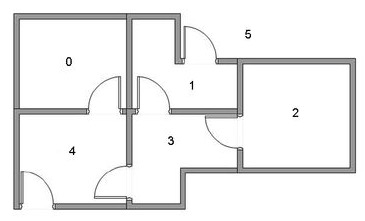

# Graph
Represent the room as nodes in a graph. The doors connecting the rooms as edges. Add circular loop to goal room point to represent it as a terminating step. 

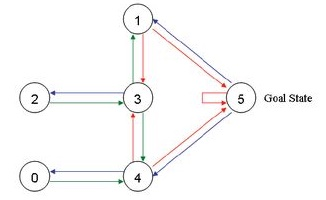

In [62]:
#graph connections
points_connection_list = [(0,4), (4,3), (4,5), (2,3), (3,1), (1,5)]

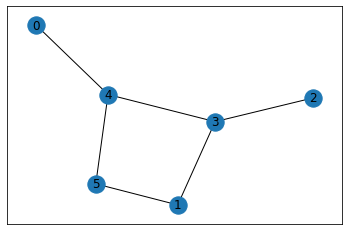

In [63]:
#visualise the graph
import networkx as nx
G = nx.Graph()
G.add_edges_from(points_connection_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [64]:
#goal : final room to reach is 5 == outside
goal = 5

In [65]:
# how many points in graph? x points
MATRIX_SIZE = 6

In [66]:
# create Reward matrix = x*x
# rows represent the node for the current room in which the robot is in
# columns represent the node for the next room that the robot can go into from the current room
# initialise to -1 as if no rooms were connected
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, -1.00]])

In [67]:
# Update Reward matrix : assign zeros to viable paths and 100 to goal-reaching connections
for point in points_connection_list:
  print(point)
  if point[1] == goal:
    R[point] = 100
  else:
    R[point] = 0

  if point[0] == goal:
    R[point[::-1]] = 100
  else:
    R[point[::-1]] = 0

R[goal, goal] = 100

R


(0, 4)
(4, 3)
(4, 5)
(2, 3)
(3, 1)
(1, 5)


matrix([[-1.00, -1.00, -1.00, -1.00, 0.00, -1.00],
        [-1.00, -1.00, -1.00, 0.00, -1.00, 100.00],
        [-1.00, -1.00, -1.00, 0.00, -1.00, -1.00],
        [-1.00, 0.00, 0.00, -1.00, 0.00, -1.00],
        [0.00, -1.00, -1.00, 0.00, -1.00, 100.00],
        [-1.00, 0.00, -1.00, -1.00, 0.00, 100.00]])

# Q-learning

In [68]:
#Q-table depending on the current room, the table keeps the value of going to the connecting room in the quest for getting to the outside
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
Q

matrix([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [69]:
# initialising learning parameter
gamma = 0.8

In [70]:
# from reward matrix get the indexes that represent the rooms that the robot can go into from it's current room
def available_actions(state):
  current_state_row = R[state,]
  avail_actions_indexes = np.where(current_state_row >= 0)[1]
  return avail_actions_indexes


In [71]:
# randomly choose the next room the robot should go into from it's current room
def sample_next_action(avail_actions_indexes):
  next_action_index = int(np.random.choice(avail_actions_indexes, 1))
  return next_action_index


In [72]:
# update the Q-table using Temporal Difference and return the score as total sum of percentages of value of each connection between rooms
def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,])) [1] # when the robot goes into the next room ie 'action', choose the room that holds the highest value in the quest to go to the 'goal' room

  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index,1))
  else:
    max_index = int(max_index)

  next_state = action
  max_value = Q[next_state, max_index]
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  # print('max_value : ', R[current_state, action] + gamma * max_value)

  #compute score
  score = 0
  if np.max(Q) > 0:
    score = np.sum(Q/np.max(Q) * 100)
  else:
    score = 0
  return score


#Testing the functions

In [73]:
initial_state = 1

In [74]:
available_act = available_actions(initial_state)
available_act

array([3, 5])

In [75]:
action = sample_next_action(available_act)
action

3

In [76]:
update(initial_state, 0, gamma)

0

# Q-Learning : Training

In [77]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    # print ('Score:', str(score))



In [78]:
print("Trained Q matrix:")
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(Q/np.max(Q)*100)

Trained Q matrix:
[[0.00 0.00 0.00 0.00 80.00 0.00]
 [-0.20 0.00 0.00 64.00 0.00 100.00]
 [0.00 0.00 0.00 64.00 0.00 0.00]
 [0.00 79.99 51.20 0.00 80.00 0.00]
 [64.00 0.00 0.00 64.00 0.00 100.00]
 [0.00 80.00 0.00 0.00 79.97 100.00]]


# Q-Learning : Testing

In [79]:

current_state = 2
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[2, 3, 4, 5]


# How the episodes settle the Q-values

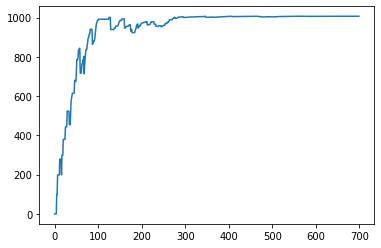

In [80]:
plt.plot(scores)
plt.show()